Definicja perceptronu i funkcje pomocnicze

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image

In [8]:
def load_mnist_data(csv_file, delimiter=','):
    data = np.loadtxt(csv_file, delimiter=delimiter)
    x = data[:, 1:]
    y = data[:, 0]
    return x, y

def filter_digits(x, y, digits):
    mask = np.isin(y, digits)
    x_filtered = x[mask]
    y_filtered = y[mask]
    return x_filtered, y_filtered

def load_image(image_path):
    image = Image.open(image_path)
    image = image.resize((28, 28))
    image = image.convert('L')
    image_array = np.array(image)
    image_array_1d = image_array.flatten()
    image_array_1d = image_array_1d / 255.0
    return image_array_1d

In [9]:
class Perceptron:
    def __init__(self, n, epochs=100):
        self.w = np.random.rand(n + 1)
        self.epochs = epochs

    def predict(self, x):
        if len(x) == len(self.w) - 1:
            x = np.insert(x, 0, 1)
        return 1 if np.dot(self.w, x) > 0 else 0

    def train(self, xx, d, eta, tol, plot=False):
        errors = []
        n_samples, n_features = xx.shape
        xx_with_bias = np.c_[np.ones(n_samples), xx]
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(n_samples):
                y_pred = self.predict(xx_with_bias[i])
                error = d[i] - y_pred
                self.w += eta * error * xx_with_bias[i]
                total_error += abs(error)
            errors.append(total_error)
            if total_error <= tol:
                break
        if plot:
            plt.plot(errors)
            plt.xlabel('Epoka')
            plt.ylabel('Liczba błędów')
            plt.title('Liczba błędów w czasie treningu')
            plt.show()

    def evaluate_test(self, xx, d):
        n_samples = len(d)
        correct_predictions = 0
        xx_with_bias = np.c_[np.ones(n_samples), xx]
        for i in range(n_samples):
            y_pred = self.predict(xx_with_bias[i])
            if y_pred == d[i]:
                correct_predictions += 1
        accuracy = correct_predictions / n_samples
        return accuracy

Filtracja zbioru

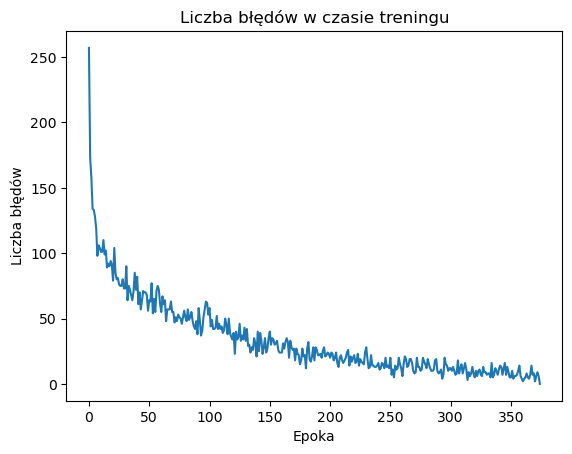

Dokładność na zbiorze testowym: 0.9865805168986084


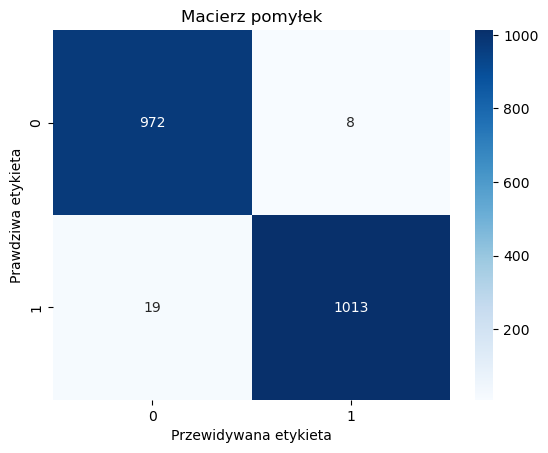

Przewidziana cyfra to: 0
Przewidziana cyfra to: 2


In [10]:
cyfry = [0, 2]  # Wybrane cyfry

train_x, train_y = load_mnist_data('mnist_train.csv')
filtered_train_x, filtered_train_y = filter_digits(train_x, train_y, cyfry)
filtered_train_y = np.where(filtered_train_y == cyfry[0], 0, 1)
filtered_train_x = filtered_train_x / 255.0

test_x, test_y = load_mnist_data('mnist_test.csv')
filtered_test_x, filtered_test_y = filter_digits(test_x, test_y, cyfry)
filtered_test_y = np.where(filtered_test_y == cyfry[0], 0, 1)
filtered_test_x = filtered_test_x / 255.0

perceptron = Perceptron(784, epochs=1000) 
perceptron.train(filtered_train_x, filtered_train_y, eta=0.3, tol=0, plot=True)

accuracy = perceptron.evaluate_test(filtered_test_x, filtered_test_y)
print(f"Dokładność na zbiorze testowym: {accuracy}")

# Macierz pomyłek
y_pred = [perceptron.predict(x) for x in filtered_test_x]
cm = confusion_matrix(filtered_test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Przewidywana etykieta')
plt.ylabel('Prawdziwa etykieta')
plt.title('Macierz pomyłek')
plt.show()

obraz_dane = load_image("zero.bmp")
predicted_digit = perceptron.predict(obraz_dane)
print(f'Przewidziana cyfra to: {cyfry[predicted_digit]}')
obraz_dane2 = load_image("dwa.bmp")
predicted_digit2 = perceptron.predict(obraz_dane2)
print(f'Przewidziana cyfra to: {cyfry[predicted_digit2]}')
